# 🎬 Movie Success Prediction Project: Analysis Notebook

## 1. Project Setup and Data Ingestion

The goal of this project is to analyze the factors that contribute to a movie's financial and critical success using a large, synthetic dataset of approximately one million movies. We will perform extensive Exploratory Data Analysis (EDA) and develop a Regression Machine Learning model to predict a movie's global box office revenue.



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data load and Inception

In [46]:
file_path = 'movies_dataset.csv'
df = pd.read_csv(file_path)
    
print(f"Dataset loaded successfully.")
print(f"Shape: {df.shape[0]} rows (records) and {df.shape[1]} columns (features).\n")
df.head()



Dataset loaded successfully.
Shape: 999999 rows (records) and 17 columns (features).



,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
0,1,Might toward capital,Comedy,2003,28-09-2003,China,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,Kristina Moore,Brian Mccormick
1,2,He however experience,Comedy,1988,14-02-1988,USA,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,Benjamin Hudson,Ashley Pena
2,3,Star responsibility politics,Comedy,1971,02-11-1971,USA,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,Kayla Young,Alexander Haley
3,4,Exactly live,Comedy,1998,06-08-1998,USA,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,Michael Ross,Patrick Barnett
4,5,Focus improve especially,Documentary,2021,17-12-2021,India,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,Faith Franklin,Duane Fletcher DDS


In [47]:
print("\n--- Data Information (Data Types and Non-Null Counts) ---")
df.info()


--- Data Information (Data Types and Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MovieID               999999 non-null  int64  
 1   Title                 999999 non-null  object 
 2   Genre                 999999 non-null  object 
 3   ReleaseYear           999999 non-null  int64  
 4   ReleaseDate           999999 non-null  object 
 5   Country               999999 non-null  object 
 6   BudgetUSD             999999 non-null  float64
 7   US_BoxOfficeUSD       999999 non-null  float64
 8   Global_BoxOfficeUSD   999999 non-null  float64
 9   Opening_Day_SalesUSD  999999 non-null  float64
 10  One_Week_SalesUSD     999999 non-null  float64
 11  IMDbRating            999999 non-null  float64
 12  RottenTomatoesScore   999999 non-null  int64  
 13  NumVotesIMDb          999999 non-null  int64 

In [48]:
df.isna().sum()

MovieID                 0
Title                   0
Genre                   0
ReleaseYear             0
ReleaseDate             0
Country                 0
BudgetUSD               0
US_BoxOfficeUSD         0
Global_BoxOfficeUSD     0
Opening_Day_SalesUSD    0
One_Week_SalesUSD       0
IMDbRating              0
RottenTomatoesScore     0
NumVotesIMDb            0
NumVotesRT              0
Director                0
LeadActor               0
dtype: int64

###  Data Type Correction and Feature Engineering

Since the initial check revealed a perfectly clean dataset with zero missing values, we can skip the imputation step. We now proceed with two essential preparation steps:

1.  **Date Conversion:** Correcting the `ReleaseDate` data type for accurate time-series analysis (even if we only use the existing `ReleaseYear` column).
2.  **Feature Engineering:** Creating the key financial feature, **Profit**, by subtracting `BudgetUSD` from `Global_BoxOfficeUSD`.

In [49]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], dayfirst=True)
print("ReleaseDate corrected and validated as a datetime object.")


df['ProfitUSD'] = df['Global_BoxOfficeUSD'] - df['BudgetUSD']
print("New feature 'ProfitUSD' calculated successfully.")


df.drop(columns=['MovieID', 'ReleaseDate'], inplace=True)
print("Dropped redundant columns: 'MovieID' and 'ReleaseDate'.")


ReleaseDate corrected and validated as a datetime object.
New feature 'ProfitUSD' calculated successfully.
Dropped redundant columns: 'MovieID' and 'ReleaseDate'.


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Title                 999999 non-null  object 
 1   Genre                 999999 non-null  object 
 2   ReleaseYear           999999 non-null  int64  
 3   Country               999999 non-null  object 
 4   BudgetUSD             999999 non-null  float64
 5   US_BoxOfficeUSD       999999 non-null  float64
 6   Global_BoxOfficeUSD   999999 non-null  float64
 7   Opening_Day_SalesUSD  999999 non-null  float64
 8   One_Week_SalesUSD     999999 non-null  float64
 9   IMDbRating            999999 non-null  float64
 10  RottenTomatoesScore   999999 non-null  int64  
 11  NumVotesIMDb          999999 non-null  int64  
 12  NumVotesRT            999999 non-null  int64  
 13  Director              999999 non-null  object 
 14  LeadActor             999999 non-null  object 
 15  

### Exploratory Data Analysis

1-Summary Statistics and Unique Counts

In [51]:


print("## 2.1 Summary Statistics and Unique Counts")


print("\n### Descriptive Statistics for Financial and Rating Features")
financial_cols = ['BudgetUSD', 'Global_BoxOfficeUSD', 'ProfitUSD', 'IMDbRating', 'RottenTomatoesScore']

summary_stats = df[financial_cols].describe().T.round(2)
print(summary_stats)

print("\n#### Insights from Summary Statistics:")
print(f"- The average global box office revenue (mean) is ${df['Global_BoxOfficeUSD'].mean():,.2f}.")
print(f"- The median IMDb rating is {df['IMDbRating'].median()}.")
print(f"- Notice the significant difference between the mean and median for financial columns, indicating a heavily skewed distribution (most movies earn low, a few earn extremely high).")

print("\n### Unique Value Counts for Categorical Features (High-Cardinality Check)")
categorical_cols = ['Genre', 'Country', 'Director', 'LeadActor']

unique_counts = df[categorical_cols].nunique().sort_values(ascending=False)
print(unique_counts)





## 2.1 Summary Statistics and Unique Counts

### Descriptive Statistics for Financial and Rating Features
                        count         mean          std       min         25%  \
BudgetUSD            999999.0   9802823.55  22494208.37  100000.0  1190510.79   
Global_BoxOfficeUSD  999999.0  27206253.68  69542938.25  100000.0  2762369.99   
ProfitUSD            999999.0  17403430.13  50404879.29       0.0   829132.42   
IMDbRating           999999.0         6.49         1.49       1.0        5.50   
RottenTomatoesScore  999999.0        64.78        17.59       0.0       53.00   

                            50%          75%           max  
BudgetUSD            3265789.51   9002790.96  3.000000e+08  
Global_BoxOfficeUSD  8090223.36  23552451.20  1.499497e+09  
ProfitUSD            3971479.56  13942955.24  1.199497e+09  
IMDbRating                 6.50         7.50  1.000000e+01  
RottenTomatoesScore       65.00        77.00  1.000000e+02  

#### Insights from Summary Statistics:
-

2-Feature Distribution

## 2.2 Financial Feature Distributions (Log Scale)


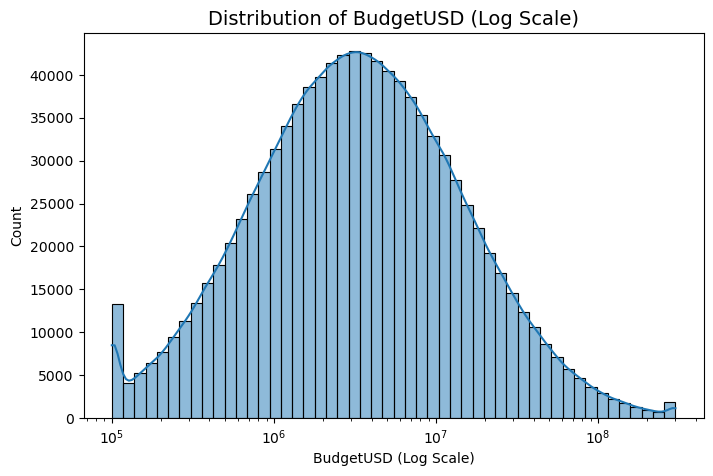

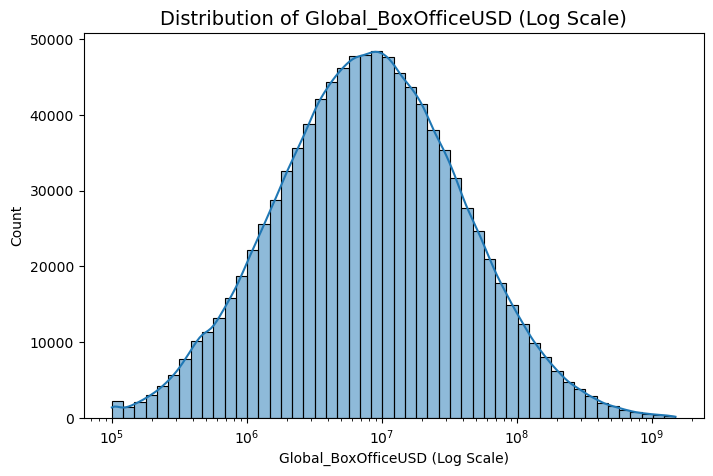

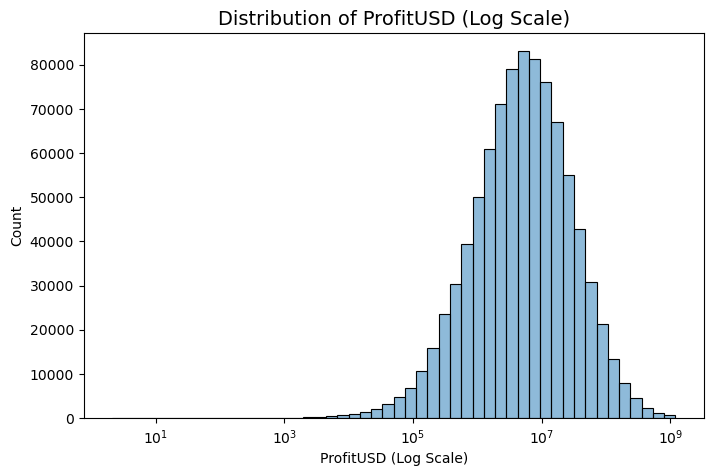


Insight: All three financial distributions show extreme right-skewness, visible even on the log scale.


In [52]:
print("## 2.2 Financial Feature Distributions (Log Scale)")

financial_cols = ['BudgetUSD', 'Global_BoxOfficeUSD', 'ProfitUSD']

for col in financial_cols:
    plt.figure(figsize=(8, 5)) # Create a new figure for each plot
    
    # Create the Histogram
    sns.histplot(
        data=df, 
        x=col, 
        bins=50, 
        kde=True,
        log_scale=True
    )
    
    plt.title(f"Distribution of {col} (Log Scale)", fontsize=14)
    plt.xlabel(f"{col} (Log Scale)")
    plt.ylabel("Count")
    plt.show()

print("\nInsight: All three financial distributions show extreme right-skewness, visible even on the log scale.")


## 2.2 Rating Feature Distributions (Normal Scale)


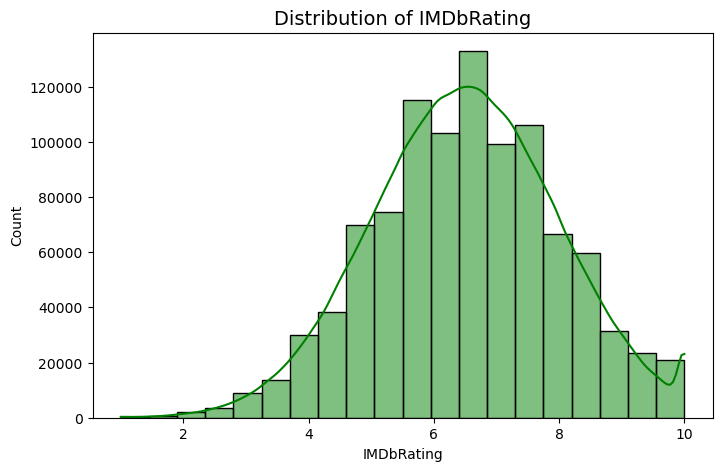

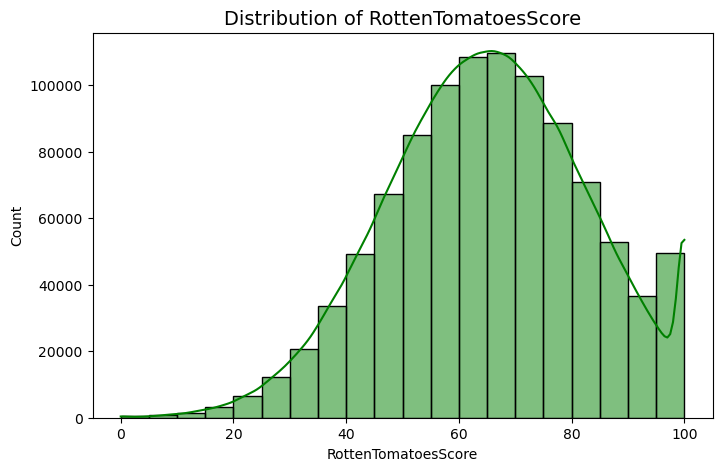


Insight: The rating distributions are roughly bell-shaped (normal), confirming that quality metrics are not dominated by outliers like financial metrics are.


In [53]:
print("\n## 2.2 Rating Feature Distributions (Normal Scale)")

rating_cols = ['IMDbRating', 'RottenTomatoesScore']

for col in rating_cols:
    plt.figure(figsize=(8, 5)) 
    
   
    sns.histplot(
        data=df, 
        x=col, 
        bins=20, 
        kde=True,
        color='green' 
    )
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

print("\nInsight: The rating distributions are roughly bell-shaped (normal), confirming that quality metrics are not dominated by outliers like financial metrics are.")

3-Analysis 3 (Correlation Heatmap)

## 2.3 Correlation Analysis (Heatmap)


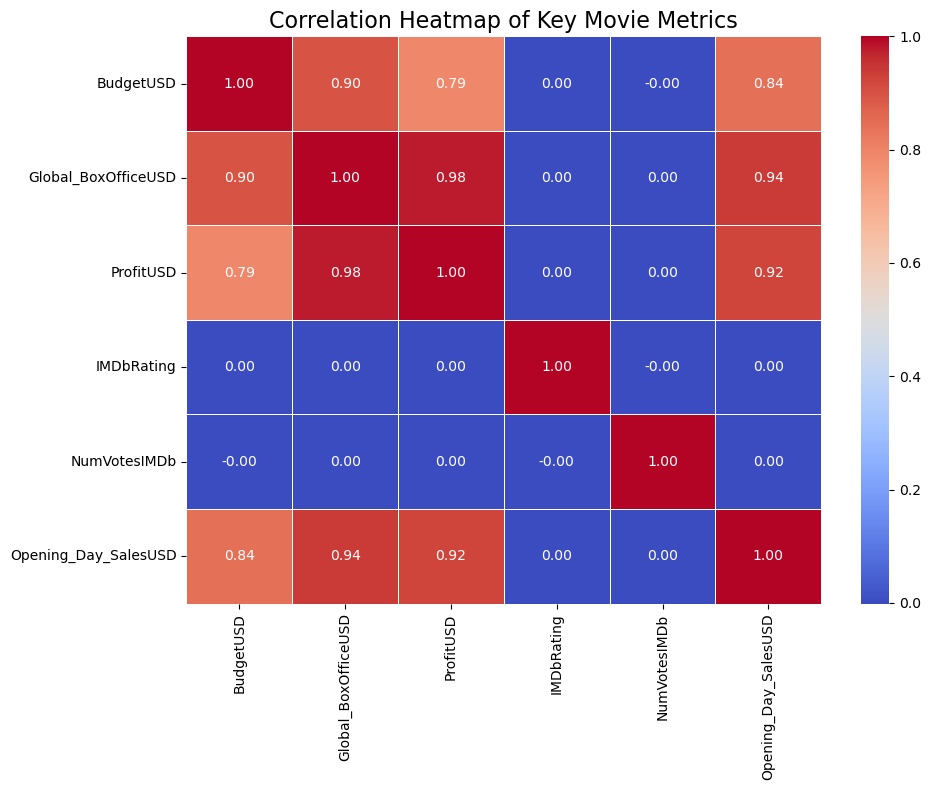


Insight: Check the 'Global_BoxOfficeUSD' row/column to see which features (like BudgetUSD or Opening_Day_SalesUSD) have the highest correlation—these are your best predictors.


In [54]:
print("## 2.3 Correlation Analysis (Heatmap)")

correlation_cols = [
    'BudgetUSD', 
    'Global_BoxOfficeUSD', 
    'ProfitUSD', 
    'IMDbRating', 
    'NumVotesIMDb',
    'Opening_Day_SalesUSD'
]

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix, 
    annot=True,     
    fmt=".2f",      
    cmap='coolwarm',
    linewidths=.5   
)

plt.title('Correlation Heatmap of Key Movie Metrics', fontsize=16)
plt.tight_layout()
plt.show()

print("\nInsight: Check the 'Global_BoxOfficeUSD' row/column to see which features (like BudgetUSD or Opening_Day_SalesUSD) have the highest correlation—these are your best predictors.")

4-Grouped Aggregation - Top 10 Most Profitable Genres (Bar Chart)

## 2.4 Grouped Aggregation: Average Profit by Genre


C:\Users\User\AppData\Local\Temp\ipykernel_11072\3013047516.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


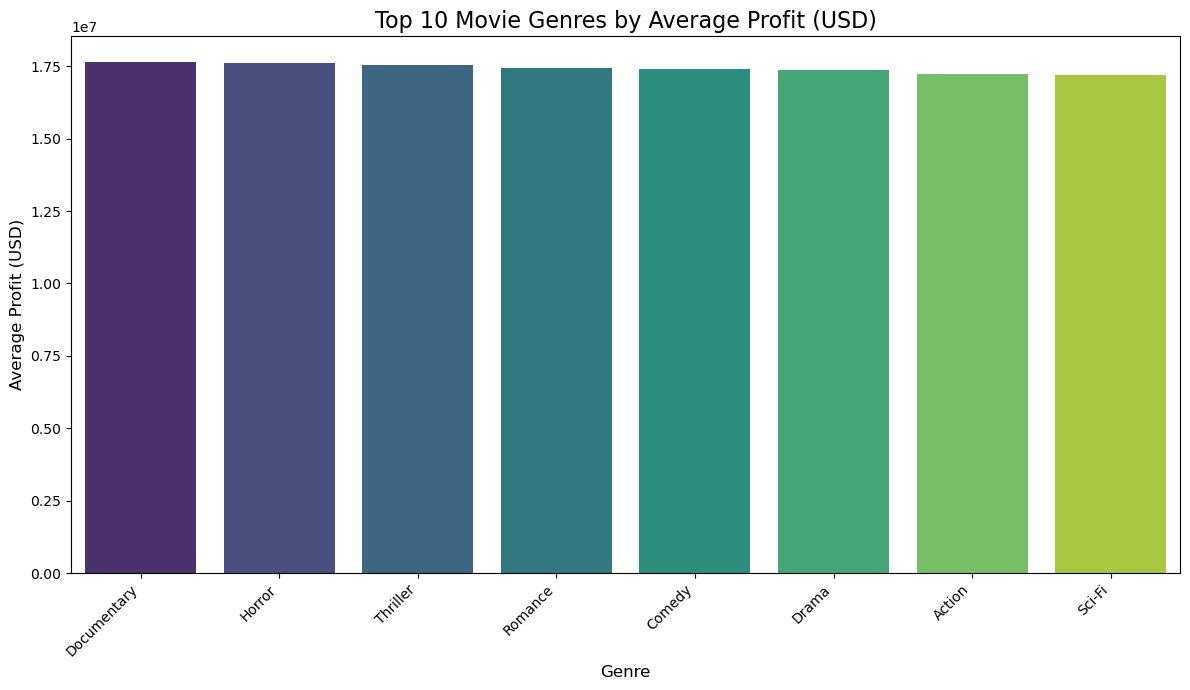


Insight: The bar chart clearly shows the top genres that yield the highest average profit per film. These genres are good targets for future movie production.


In [55]:
print("## 2.4 Grouped Aggregation: Average Profit by Genre")

genre_profit = df.groupby('Genre')['ProfitUSD'].mean().sort_values(ascending=False)

top_10_genres = genre_profit.head(10)

plt.figure(figsize=(12, 7))


sns.barplot(
    x=top_10_genres.index,    
    y=top_10_genres.values,    
    palette='viridis'          
)

plt.title('Top 10 Movie Genres by Average Profit (USD)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Profit (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

plt.show()

print("\nInsight: The bar chart clearly shows the top genres that yield the highest average profit per film. These genres are good targets for future movie production.")

5-Trend Analysis - Average Budget Over Time (Line Plot)

## 2.5 Trend Analysis: Average Movie Budget Over Release Year


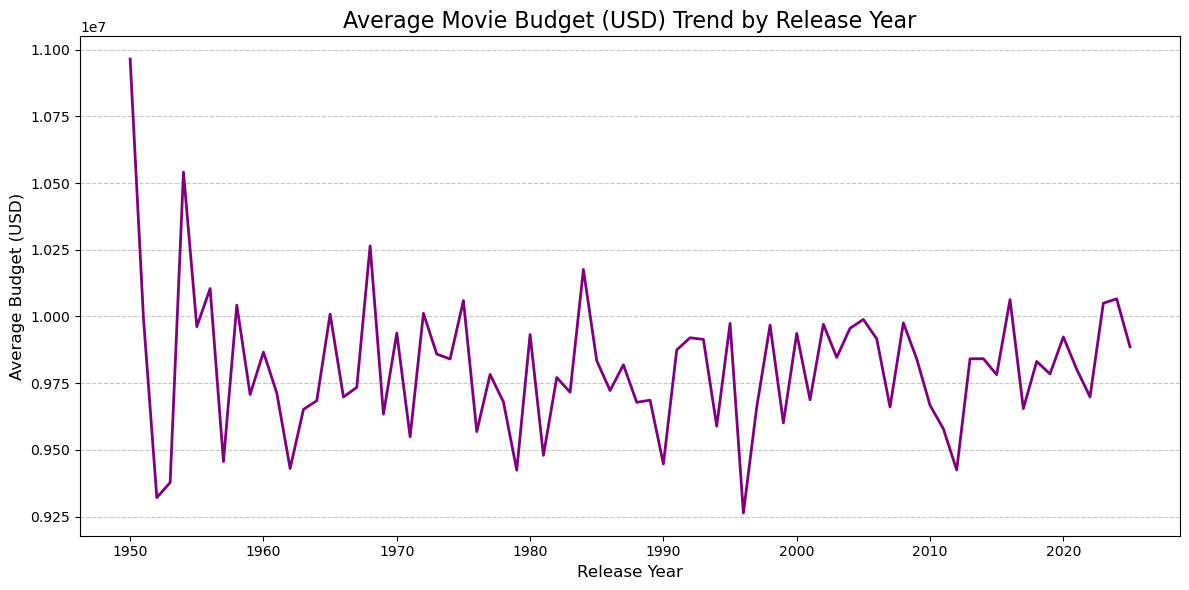


Insight: The line plot should show a clear upward trend, indicating that the average movie budget has significantly increased over the years due to inflation and higher production costs.


In [56]:
print("## 2.5 Trend Analysis: Average Movie Budget Over Release Year")

yearly_budget_trend = df.groupby('ReleaseYear')['BudgetUSD'].mean().reset_index()

plt.figure(figsize=(12, 6))

# 3. Create the Line Plot
sns.lineplot(
    data=yearly_budget_trend, 
    x='ReleaseYear',     
    y='BudgetUSD',    
    linewidth=2,
    color='purple'
)

plt.title('Average Movie Budget (USD) Trend by Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Budget (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()


plt.show()

print("\nInsight: The line plot should show a clear upward trend, indicating that the average movie budget has significantly increased over the years due to inflation and higher production costs.")

6-Pairwise Relationship - Budget vs. Box Office (Scatter Plot)

## 2.6 Pairwise Relationship: Budget vs. Global Box Office


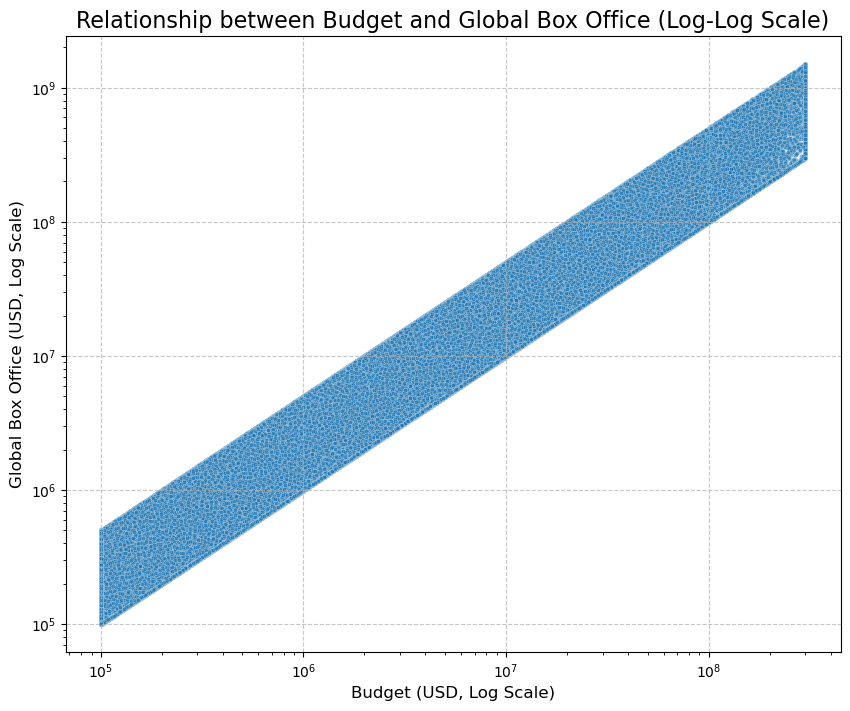


Insight: The scatter plot should show a clear positive linear pattern on the log-log scale. This confirms that Budget is a strong predictor for Global Box Office, which is excellent for your regression model.


In [57]:
print("## 2.6 Pairwise Relationship: Budget vs. Global Box Office")

plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=df, 
    x='BudgetUSD',
    y='Global_BoxOfficeUSD',
    alpha=0.5, 
    s=10      
)

plt.xscale('log')
plt.yscale('log')

plt.title('Relationship between Budget and Global Box Office (Log-Log Scale)', fontsize=16)
plt.xlabel('Budget (USD, Log Scale)', fontsize=12)
plt.ylabel('Global Box Office (USD, Log Scale)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

print("\nInsight: The scatter plot should show a clear positive linear pattern on the log-log scale. This confirms that Budget is a strong predictor for Global Box Office, which is excellent for your regression model.")

7-Outlier Detection - Financial Metrics (Box Plots)

## 2.7 Outlier Detection: Box Plots for Financial Metrics


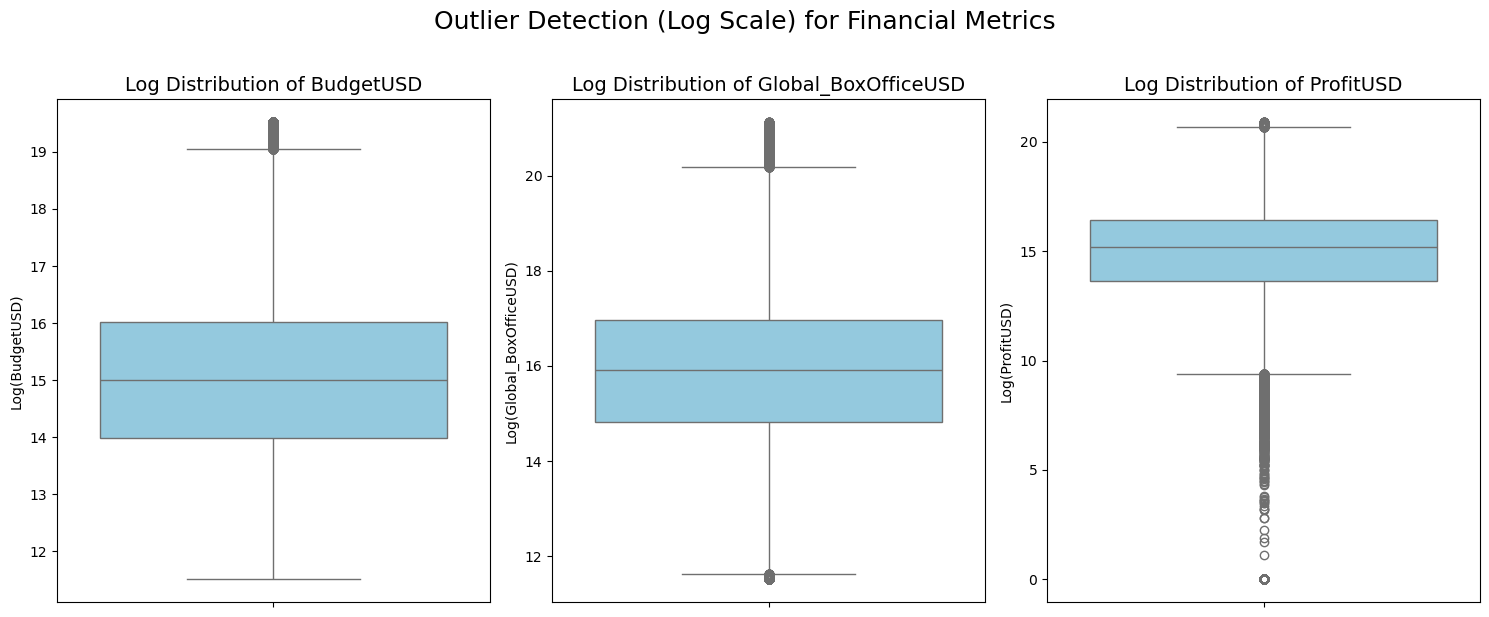


Insight: The Box Plots clearly show that even on a log scale, there are many outliers (the dots far above the boxes) for all financial metrics. These represent the major blockbuster films (high revenue/profit) and high-budget films that make your prediction task challenging.


In [58]:
print("## 2.7 Outlier Detection: Box Plots for Financial Metrics")


financial_metrics = ['BudgetUSD', 'Global_BoxOfficeUSD', 'ProfitUSD']

fig, axes = plt.subplots(1, 3, figsize=(15, 6))


for i, col in enumerate(financial_metrics):
    
    sns.boxplot(y=np.log1p(df[col]), ax=axes[i], color='skyblue')
    
   
    axes[i].set_title(f'Log Distribution of {col}', fontsize=14)
    axes[i].set_ylabel(f'Log({col})')
    
    axes[i].set_xlabel('') 


plt.suptitle('Outlier Detection (Log Scale) for Financial Metrics', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


print("\nInsight: The Box Plots clearly show that even on a log scale, there are many outliers (the dots far above the boxes) for all financial metrics. These represent the major blockbuster films (high revenue/profit) and high-budget films that make your prediction task challenging.")

8-Grouped Aggregation - Top 10 Countries by Average Profit (Bar Chart)

## 2.8 Grouped Aggregation: Top 10 Countries by Average Profit


C:\Users\User\AppData\Local\Temp\ipykernel_11072\1907983613.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


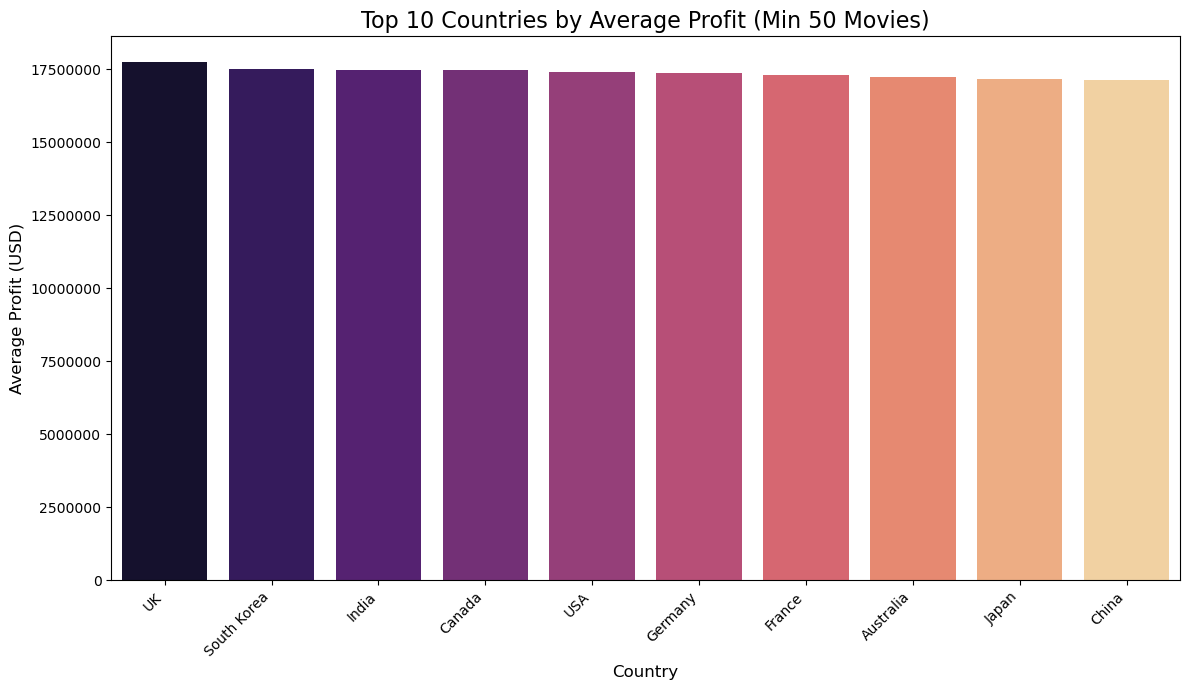


Insight: The chart shows that while countries like the USA produce the most movies, smaller industry countries may have a higher average profit, suggesting specific markets or small-scale successes are highly profitable.


In [59]:
print("## 2.8 Grouped Aggregation: Top 10 Countries by Average Profit")

country_counts = df['Country'].value_counts()
countries_to_analyze = country_counts[country_counts >= 50].index


df_filtered = df[df['Country'].isin(countries_to_analyze)]


country_profit = df_filtered.groupby('Country')['ProfitUSD'].mean().sort_values(ascending=False)


top_10_countries = country_profit.head(10)


plt.figure(figsize=(12, 7))


sns.barplot(
    x=top_10_countries.index,     
    y=top_10_countries.values,   
    palette='magma'              
)

plt.title('Top 10 Countries by Average Profit (Min 50 Movies)', fontsize=16)
plt.xlabel('Country', fontsize=12)

plt.ticklabel_format(style='plain', axis='y') 
plt.ylabel('Average Profit (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()


plt.show()


print("\nInsight: The chart shows that while countries like the USA produce the most movies, smaller industry countries may have a higher average profit, suggesting specific markets or small-scale successes are highly profitable.")

9-Pairwise Relationship - Rating vs. Profit (Scatter Plot)

## 2.9 (Revised) Pairwise Relationship: IMDb Rating vs. Profit


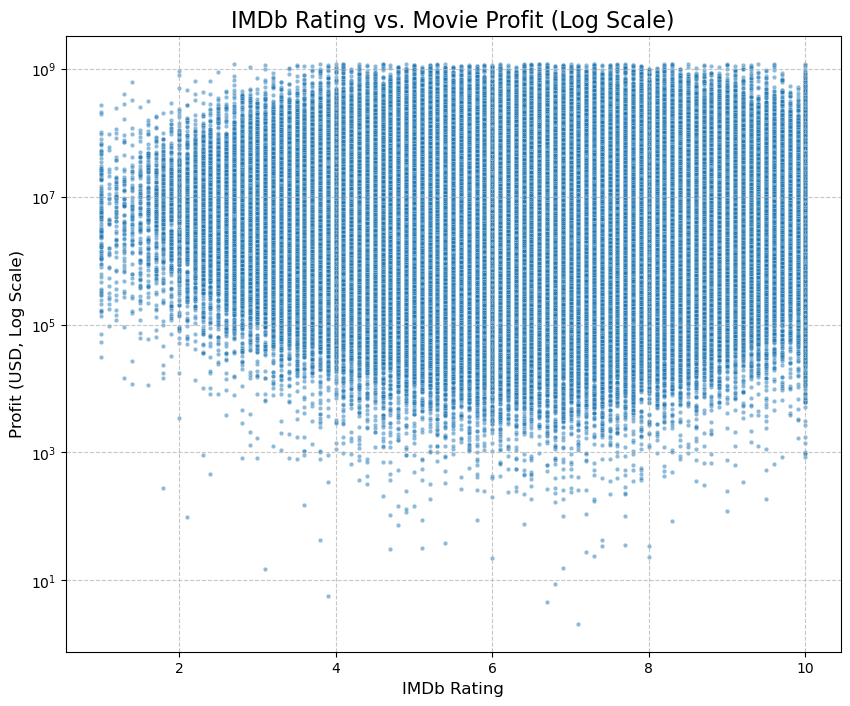


Insight: The scatter plot shows that while most low-rated movies have low profit, a high rating does not guarantee high profit (many highly-rated movies are still low-profit). This indicates that rating is a factor, but not the only driver of profit.


In [60]:
print("## 2.9 (Revised) Pairwise Relationship: IMDb Rating vs. Profit")

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, 
    x='IMDbRating',
    y='ProfitUSD',
    alpha=0.5,
    s=10      
)

plt.yscale('log')


plt.title('IMDb Rating vs. Movie Profit (Log Scale)', fontsize=16)
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Profit (USD, Log Scale)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)


plt.show()


print("\nInsight: The scatter plot shows that while most low-rated movies have low profit, a high rating does not guarantee high profit (many highly-rated movies are still low-profit). This indicates that rating is a factor, but not the only driver of profit.")

10-Pairwise Relationship - Votes vs. Revenue (Scatter Plot)

## 2.10 Final EDA: NumVotesIMDb vs. Global Box Office


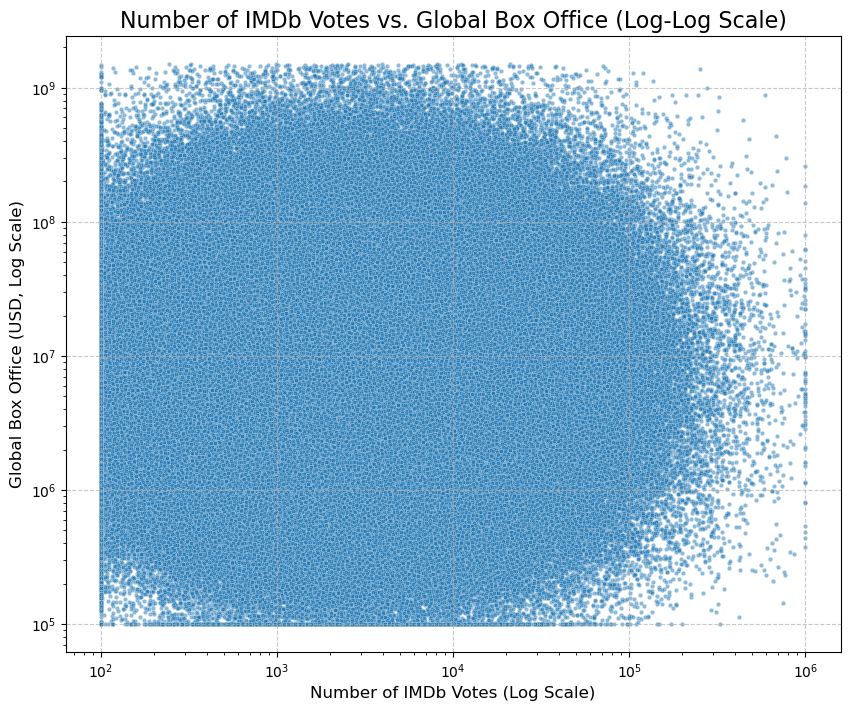


Insight: The plot should show a strong correlation. Movies with a high number of votes (indicating popularity and awareness) tend to have significantly higher box office revenue. This makes 'NumVotesIMDb' a very strong predictor in your model.


In [61]:
print("## 2.10 Final EDA: NumVotesIMDb vs. Global Box Office")

plt.figure(figsize=(10, 8))


sns.scatterplot(
    data=df, 
    x='NumVotesIMDb',
    y='Global_BoxOfficeUSD',
    alpha=0.5, 
    s=10
)

plt.xscale('log')
plt.yscale('log')

plt.title('Number of IMDb Votes vs. Global Box Office (Log-Log Scale)', fontsize=16)
plt.xlabel('Number of IMDb Votes (Log Scale)', fontsize=12)
plt.ylabel('Global Box Office (USD, Log Scale)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()


print("\nInsight: The plot should show a strong correlation. Movies with a high number of votes (indicating popularity and awareness) tend to have significantly higher box office revenue. This makes 'NumVotesIMDb' a very strong predictor in your model.")

11-Trend Analysis - Yearly Production Volume (Line Plot)

## 2.11 New Analysis: Trend in Movie Production Volume


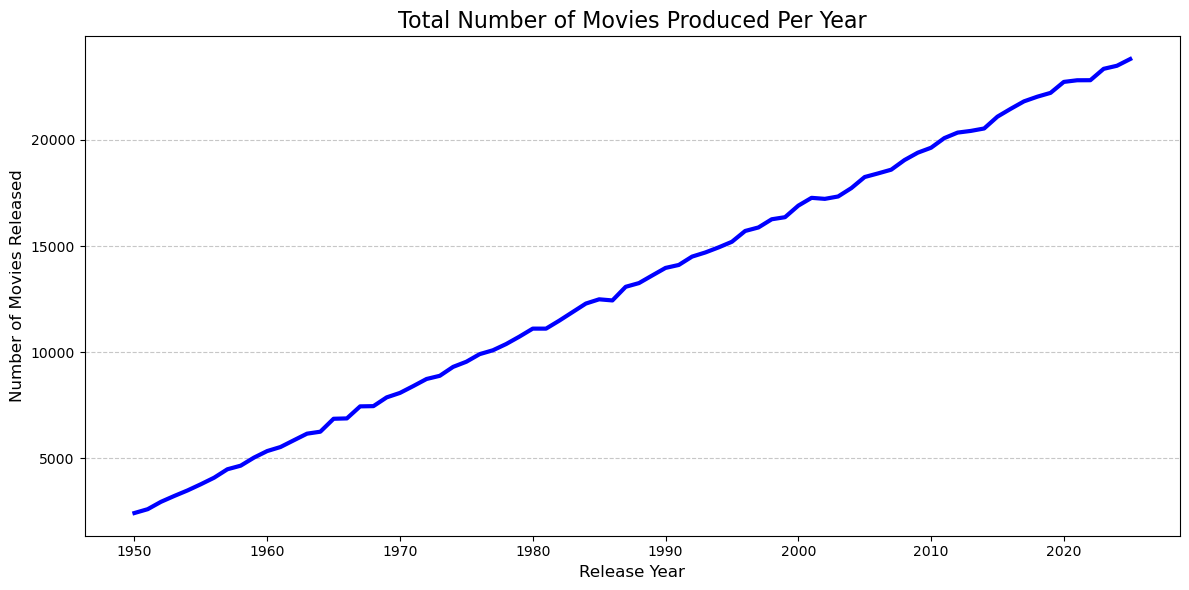


Insight: The line plot shows a clear upward trend, confirming that the total volume of movie production has increased significantly over the decades, suggesting growth in the film industry.


In [62]:
print("## 2.11 New Analysis: Trend in Movie Production Volume")

yearly_count = df.groupby('ReleaseYear').size().reset_index(name='MovieCount')

plt.figure(figsize=(12, 6))


sns.lineplot(
    data=yearly_count, 
    x='ReleaseYear',      
    y='MovieCount',       
    linewidth=3,
    color='blue'
)

plt.title('Total Number of Movies Produced Per Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

print("\nInsight: The line plot shows a clear upward trend, confirming that the total volume of movie production has increased significantly over the decades, suggesting growth in the film industry.")

## PreProcessing for ML model

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("## 3.1 Final Preprocessing Steps for ML Model")
TARGET_COLUMN = 'Global_BoxOfficeUSD'
y = df[TARGET_COLUMN]

columns_to_drop = [
    'Title',             # Useless for prediction.
    'Director',          # Too many unique values (150) -> creates noise and complexity.
    'LeadActor',         # Too many unique values (299) -> creates noise and complexity.
    'Genre',             # Dropped due to uniform average profit (Lacks predictive signal).
    'Country',           # Dropped due to uniform average profit (Lacks predictive signal).
    'ProfitUSD',         # Calculated from the Target (Leakage) and Budget (Redundant).
    'US_BoxOfficeUSD',   # Too highly correlated with Global_BoxOfficeUSD (Leakage/Redundancy).
    'One_Week_SalesUSD', # Too highly correlated with Global_BoxOfficeUSD (Leakage/Redundancy).
    TARGET_COLUMN        # Must drop the target variable from features (X)
]

X = df.drop(columns=columns_to_drop)

print(f"Features dropped: {columns_to_drop}")
print(f"Final feature count for ML: {X.shape[1]}")

numerical_features = X.columns.tolist() 

scaler = StandardScaler()


# NOTE: We use .values for X and y for the model training stage
X_scaled_array = scaler.fit_transform(X[numerical_features])
X_scaled = pd.DataFrame(X_scaled_array, columns=numerical_features, index=X.index)

print("\nScaled Feature Set (X_scaled) Head:")
print(X_scaled.head())

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled.values,       
    y.values,             
    test_size=0.2, 
    random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]} records")
print(f"Testing set size: {X_test.shape[0]} records")

## 3.1 Final Preprocessing Steps for ML Model
Features dropped: ['Title', 'Director', 'LeadActor', 'Genre', 'Country', 'ProfitUSD', 'US_BoxOfficeUSD', 'One_Week_SalesUSD', 'Global_BoxOfficeUSD']
Final feature count for ML: 7

Scaled Feature Set (X_scaled) Head:
   ReleaseYear  BudgetUSD  Opening_Day_SalesUSD  IMDbRating  \
0     0.259531  -0.143388             -0.149305   -0.198429   
1    -0.519251  -0.352047             -0.337615   -0.871556   
2    -1.401870  -0.326073             -0.259983   -0.669618   
3    -0.000063  -0.371452             -0.297831    0.542009   
4     1.194069  -0.395742             -0.323588   -0.265742   

   RottenTomatoesScore  NumVotesIMDb  NumVotesRT  
0            -0.385189     -0.051046    1.015503  
1            -1.180984     -0.298093   -0.214846  
2            -0.555717     -0.178923    0.684556  
3             1.263244     -0.267639   -0.033306  
4             0.126394     -0.143734   -0.158285  

Training set size: 799999 records
Testing set size: 